In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [3]:
df = pd.read_excel("../../data/Datasets_Group_B.xlsx", "Classification")
df.dropna(inplace=True)
df.head()

,Year,Month,Day,Hour,Minute,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue,Motion Detection
0,2019,11,6,11,37,19.566667,54.380000,128.333333,564.000000,477.000000,731.333333,649.000000,565.000000,126.000000,0
1,2019,11,6,11,38,19.660000,53.600000,127.333333,568.333333,479.666667,732.333333,649.666667,565.000000,124.333333,0
2,2019,11,6,11,39,19.670000,53.516667,127.333333,570.000000,482.333333,733.000000,650.000000,565.333333,121.666667,0
3,2019,11,6,11,40,19.650000,53.510000,127.000000,573.333333,486.000000,732.000000,650.000000,566.000000,119.666667,0
4,2019,11,6,11,41,19.660000,53.596667,127.333333,574.000000,489.000000,732.000000,650.000000,566.000000,118.000000,0


<Axes: >

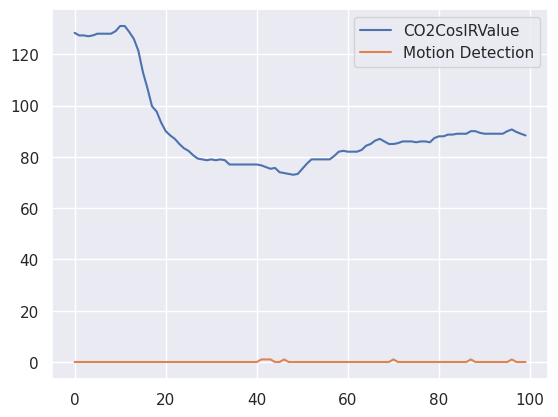

In [4]:
df[['CO2CosIRValue', 'Motion Detection']].iloc[:100].plot()

,3,Motion Detection
3,1.000000,0.025536
Motion Detection,0.025536,1.000000


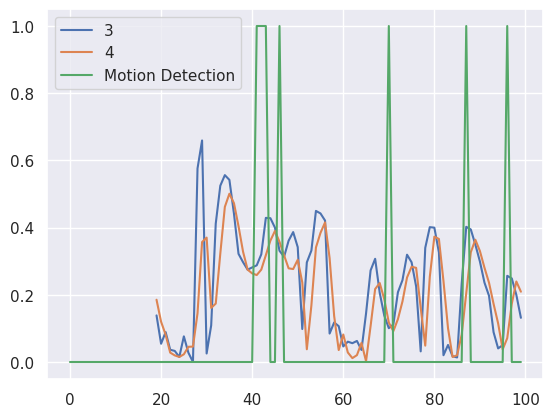

In [5]:
df['1'] = df['temperature'].rolling(window=3).mean()
df['2'] = df['temperature'].rolling(window=20).mean()
df['3'] = (df['2'] - df['temperature']).abs()
df['4'] = (df['2'] - df['1']).abs()
df[['3', '4', 'Motion Detection']].iloc[:100].plot()
df[['3', 'Motion Detection']].corr()

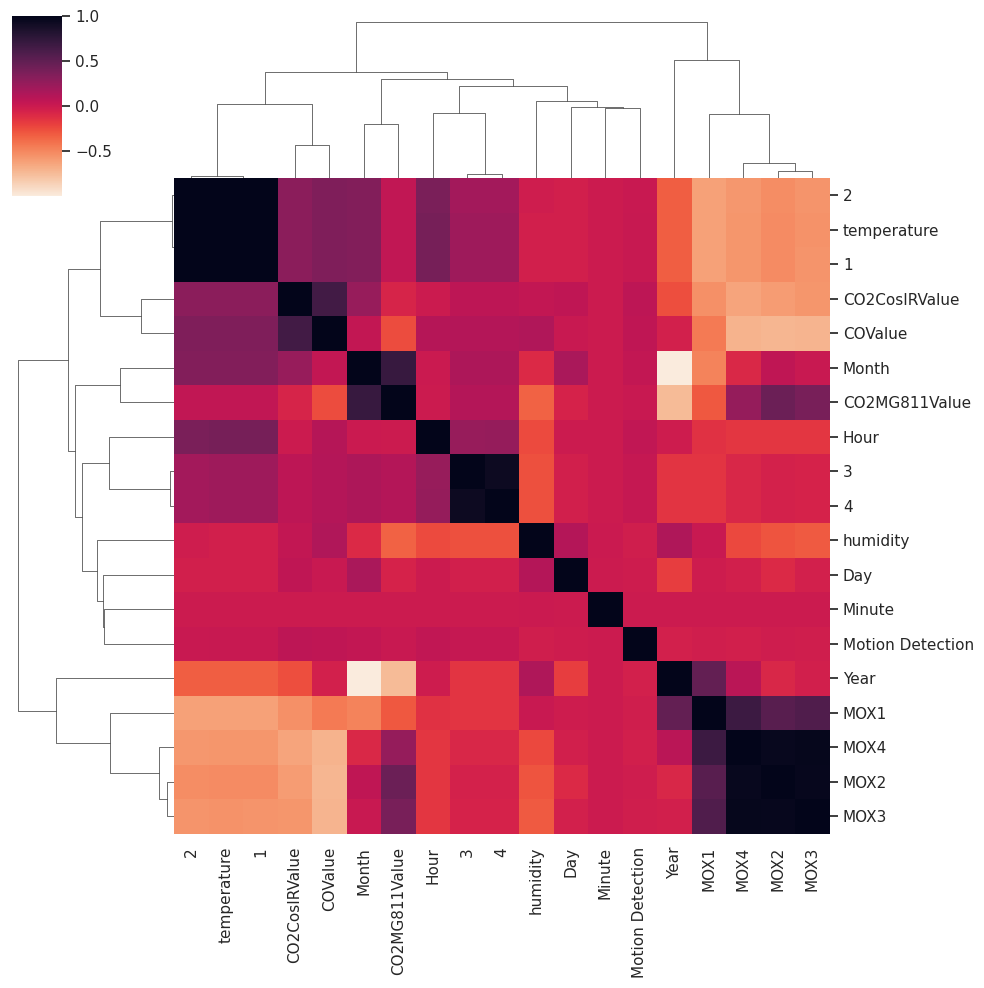

In [6]:
sns.clustermap(df.corr(), cmap="rocket_r")

In [8]:
df.corr(method='spearman')['Motion Detection']


Year               -0.040092
Month               0.041446
Day                -0.013463
Hour                0.054491
Minute             -0.005098
temperature         0.018794
humidity           -0.027265
CO2CosIRValue       0.071206
CO2MG811Value       0.011987
MOX1               -0.027069
MOX2               -0.019856
MOX3               -0.022883
MOX4               -0.030310
COValue             0.060456
Motion Detection    1.000000
1                   0.018419
2                   0.015792
3                   0.025536
4                   0.026321
Name: Motion Detection, dtype: float64